In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
# License: MIT

In [3]:
%matplotlib inline

## Packages

In [4]:
import numpy as np
import scipy as scipy
import scipy.stats as stats
import scipy.linalg as linalg
from pprint import pprint

import matplotlib.gridspec as gridspec
import matplotlib.path as mpath
import matplotlib.pyplot as plt

import sys
import os
import copy
import string
import glob
import xarray as xr 

import warnings

## Modules

In [5]:
from custom_functions import *

# Assignment 3 Q3 - Sal'nikov model

## Define model

In [6]:
# set parameters
kappa = 0.1

def Salnikov(t,x,p):
    n = x.shape
    xout = np.empty(n)
    xout[:] = np.nan 
    
    xout[0,:] = p[0,:]-kappa*x[0,:]*np.exp(x[1,:]);
    xout[1,:] = x[0,:]*np.exp(x[1,:])-x[1,:];
    return xout

## Estimate bifurcation parameter

In [7]:
def lam(mu):
    lout = -0.5*(kappa*np.exp(mu/kappa)-mu/kappa+1.)
    return lout

def df(mu): 
    hjac = 1e-6;
    J = MyJacobian(lam,mu,hjac)
    return J

tol = 1e-8;
maxit = 50;
mu0, converged, J = MySolve(lam,np.array([0.01]),df,tol,maxit)

Error is 0.113607, Residual is 0.505259
Error is 0.0164891, Residual is 0.0540672
Error is 0.000832783, Residual is 0.00247374
Error is 2.3895e-06, Residual is 7.05733e-06
Error is 1.97825e-11, Residual is 5.8426e-11


In [8]:
print('Bifurcation occurs at %g' % mu0)

Bifurcation occurs at 0.140932


## Solve IVPs

In [9]:
# set time bounds
tspan = [0,100]
hsol = 0.01

mu_min = mu0-0.01;
mu_max = mu0+0.01;

x0 = np.array([0.5,0.5]);

def Sal_min(t,x):
    xout = Salnikov(t,x,mu_min)
    return xout

def Sal_max(t,x):
    xout = Salnikov(t,x,mu_max)
    return xout

[xout1,tout1,xend1] = MyIVP(Sal_min,x0,tspan,hsol)
[xout2,tout2,xend2] = MyIVP(Sal_max,x0,tspan,hsol)

xout1 = np.squeeze(xout1)
xout2 = np.squeeze(xout2)

### Plot solution in phase plane

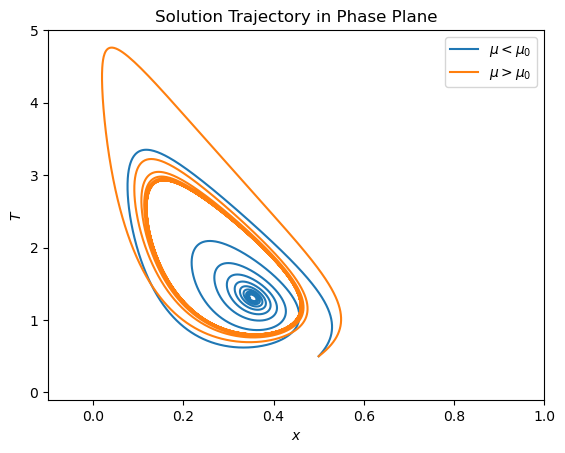

In [10]:
plt.plot(xout1[0,:],xout1[1,:])
plt.plot(xout2[0,:],xout2[1,:])
plt.xlabel("$x$")
plt.ylabel("$T$")
plt.title("Solution Trajectory in Phase Plane")
plt.xlim([-0.1, 1])
plt.ylim([-0.1, 5])
plt.legend(['$\mu<\mu_0$','$\mu>\mu_0$'])

plt.show()